# <font size="7"> Overview: Designate Bike Routes for Commuting Professionals </font>

<font size="6">Changing your commute method </font>

A long commute each morning and evening is a part of the workday for many professionals. Businesses, cities, and individuals have begun to realize the practical and health-related benefits of switching out a vehicle for a bicycle when traveling to and from work. More bicycle commuters means less traffic congestion on streets, less cars idling at stoplights, and overall less vehicle-related air pollution. Businesses and individuals realize that people who are more physically active also tend to be healthier overall. For businesses, this means fewer employees taking sick days. For individuals, it may mean less money spent on medical bills, gym memberships, and gas or vehicle repairs. All of these factors have led to a push for more bike lanes in cities to make commuting via bicycle easier and safer.

<font size="6">Making roads safe for bikers </font>

The City of Seattle, Washington, has undertaken a project to increase the number of bike lanes within the City. One aspect of the project is the addition of protected bike lanes on busy streets that offer a barrier between the bike lane and cars driving on the road. The Urban Planner in charge of the project decides that, when the project is complete, every residence will be within ½ mile of a bike route. The ½-mile goal will increase bike lane accessibility in all neighborhoods across the City so all residents will have the option to bike, regardless of where they live within the City. He also aims for at least 5 percent of the total length of streets to have bicycle lanes, a figure that is on par with Portland, Oregon, one of the most bicycle-friendly cities in the United States. The following analysis and workflow explores high-demand areas for commuters to get the project started and determine whether the Planner's goals are realistic in Seattle.

![](bikeroutesimages/road.png)

A protected bike lane in Vancouver, British Columbia, Canada (<a href="http://desktop.arcgis.com/en/analytics/case-studies/designate-bike-routes-for-commuters.htm#ESRI_SECTION2_EADFB8AF6E804A318C8095BB4AA374E8">photo info </a>)

Where are the high-demand neighborhoods?

<a href="http://doc.arcgis.com/en/esri-demographics/data/tapestry-segmentation.htm">Esri Tapestry Segmentation</a> is a resource for businesses that classifies every ZIP Code in the United States into one of <a href="http://doc.arcgis.com/en/esri-demographics/data/tapestry-segmentation.htm#ESRI_SECTION1_87F5D845F8E04723AE1F4F502FF3B636">67 segments</a> based on demographic and socioeconomic factors. The segment classification of each ZIP Code can be used to understand the people who live there, from their lifestyle choices to their consumer habits. The Tapestry data can be accessed <a href="https://www.esri.com/en-us/arcgis/products/tapestry-segmentation/overview">online</a> in a basic form or as feature layers and data enrichment in ArcGIS Online (requires an <a href="https://www.esri.com/en-us/arcgis/trial">ArcGIS Online subscription</a> and consumes <a href="http://doc.arcgis.com/en/arcgis-online/reference/credits.htm">credits</a>.)

The Esri Tapestry Segmentation was used to select a neighborhood in the vicinity of the downtown office core where commuting professionals are expected to live. The neighborhood in the 98112 ZIP Code, called Capitol Hill, contains the <a href="http://downloads.esri.com/esri_content_doc/dbl/us/tapestry/segment6.pdf">Urban Chic</a>, <a href="http://downloads.esri.com/esri_content_doc/dbl/us/tapestry/segment10.pdf">Laptops and Lattes</a>, and <a href="http://downloads.esri.com/esri_content_doc/dbl/us/tapestry/segment11.pdf">Metro Renters segments</a>. All three of the segments designated in the ZIP Code mention environmental awareness and biking, which makes the ZIP Code a good choice to get the bike lane project started. The 98112 ZIP Code was also chosen for its proximity to the downtown office core and its median income and age, which indicate it is an area where young professionals may live.

Esri Community Tapestry provides information about the income, age, and population density at the state, county, and ZIP Code levels.

Which roads would make good bike routes?

Protected bike lanes can be built on arterial streets because a barrier offers protection from road traffic. The streets designated for bike routes were chosen so the routes would be straight, direct, and have maximum coverage. Madison Street was the first street chosen because it runs directly between Capitol Hill and Downtown.
![](bikeroutesimages/madison.jpg)
Madison Street runs directly from Capitol Hill to Downtown, making it a good candidate for a protected bike lane.


Part of the purpose of this analysis is for the Urban Planner to determine the amount of coverage the bike lanes have within the neighborhood, including the percentage of street length with bike routes and the number of people within ½ mile of a bike route. Since the analysis is focused on one high-demand neighborhood, the coverage metrics were only calculated for the area within Capitol Hill, even though the bike lanes would, in reality, stretch outside of the neighborhood's boundaries. Three bike routes were required to cover the neighborhood with ½-mile buffers. The three bike routes are long, straight, and reach to the different edges of the neighborhood. Madison Street also intersects with the other two streets, although one of the intersection points is located outside of Capitol Hill, which makes it easy for a commuter to travel down one of the north–south streets and take Madison Street the rest of the way downtown.

![](bikeroutesimages/route.jpg)
Three bike routes were required to cover Capitol Hill with ½-mile buffers.

How much coverage do the chosen routes offer?


The total length of streets in Capitol Hill was calculated as well as the total length of the three bike routes within Capitol Hill. The two lengths were used to calculate a percentage of total street length that has a designated bike route. The calculation works out to just over 6 percent, which is larger than the target 5 percent that the Urban Planner chose to put Seattle on par with Portland.
![](bikeroutesimages/street.jpg)
The total length of streets in Capitol Hill was used to calculate a percentage of street length with designated bike routes.


The Planner must also determine how much of the neighborhood is within ½ mile of a bike lane. The goal the planner has set is to have the entire city within ½ mile of a bike lane to maximize the accessibility of the lanes to all of the residents. The Planner calculates the area of Capitol Hill as well as the area of the ½-mile buffers that are within the neighborhood. He then calculates the percentage of Capitol Hill that is within the ½-mile buffer. The percentage works out to approximately 97.7 percent, which is very close to the target.
![](bikeroutesimages/buffers.jpg)

The buffers were clipped to the shape of Capitol Hill and used to calculate a percentage of area within ½ mile of designated bike routes.

How many people are within ½ mile of the bike lanes?
While it is important to have a high percentage of the area of Capitol Hill within the bike lanes, it is more important to make sure the residents live within that area. The Urban Planner has access to census data, as well as building footprints for Seattle, so he decides to use Filtered Area Weighting to determine both the population of Capitol Hill and the number of Capitol Hill residents within ½ mile of the bike lanes. The two populations can then be used to calculate the percentage of Capitol Hill residents that are within ½ mile of a bike route.

Area Weighting can be a useful tool when you are trying to quantify population or demographic data within new boundaries. The figure below will be used as an example to explain two Area Weighting techniques. The hypothetical community in the figure contains three neighborhoods (blue, green, and orange) with known populations as well as an area of interest (yellow) with an unknown population. Area Weighting can be used to calculate the population of the yellow circle by multiplying the population of each neighborhood by the percentage of area within the circle and adding the three results. The estimated population in the example below is the following:
(10*0.55) + (2*0.30) + (5*0.40)
= 8.1

![](bikeroutesimages/chart.png)

The population of the yellow circle can be estimated using Area Weighting. The estimated population is approximately eight people.
The population estimate in the figure above is approximately eight people using a simple Area Weighting technique. However, the Area Weighting method seen above is very simplistic: it assumes the population is distributed uniformly across each neighborhood. A uniform population distribution is rarely seen in the real world; for instance, if the community seen above had a lake within its boundaries, there would be a large area with no population at all. A Filtered Area Weighting methodology can be used to reduce the error associated with making an estimate on area alone. A Filtered Area Weighting model uses an ancillary feature, such as building locations, to give a more accurate depiction of what proportion of the population is within the area of interest. In the example below, the houses represent where the population is located. The new estimated population within the yellow circle is the following:
(10*(4/8)) + (2*(1/2)) + (5*(1/5))
= 7

![](bikeroutesimages/chart2.png)

The population of the yellow circle can also be estimated using Filtered Area Weighting, with house locations as the ancillary feature. The new estimated population is seven people.

The Planner used his population estimations to calculate the percentage of the Capitol Hill population located within ½ mile of a bike route. He determined that approximately 99.5 percent of the population is within the ½-mile buffers.

## Workflow using Python ArcGIS

Establish a connection to your organization which could be an ArcGIS Online organization or an ArcGIS Enterprise. To be able to run the code using ArcGIS python, you would need to provide credentials of a user within an ArcGIS Online organization.

In [2]:
from arcgis import *

In [3]:
gis = GIS("https://deldev.maps.arcgis.com", "demos_deldev", "DelDevs12")

Search the data and begin performing the analysis

Accessing the content property of your gis object you can use the `search()` method. 
Search for **seatle_bike_routes** content made by other users by turning the **outside_org** to True.

<Item title:"SeattleBikeRoutes" type:Feature Layer Collection owner:VickiCove>
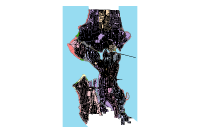

In [4]:
seattle_bike_routes = gis.content.search('title: "SeattleBikeRoutes"', 'Feature layer', outside_org=True)[0]
seattle_bike_routes

Import the **display** module to display the items.

In [5]:
from IPython.display import display

In [6]:
for lyr in seattle_bike_routes.layers:
    display(lyr.properties.name)

'Streets'

'Neighborhoods'

'Zoning'

Since the item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [7]:
bike_route_zoning = seattle_bike_routes.layers[2]

The GIS object includes a map widget for displaying geographic locations, visualizing GIS content, as well as the results of your analysis. To use the map widget, call gis.map() and assign it to a variable.

In [8]:
bike_zoning_map = gis.map('Seattle')
bike_zoning_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/1.PNG)

Identify expected commuter neighbourhoods

Use a Filter on the Zoning layer to select the downtown office core. The downtown office core is a good starting point for creating commuter bike lanes because it is expected to have a large number of commuters each day.

In [9]:
bike_route_zoning.filter = "(ZONELUT_DE = 'Downtown Office Core 1') OR (ZONELUT_DE = 'Downtown Office Core 2')"

In [10]:
fltr_mp = gis.map('Seattle')
fltr_mp

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [11]:
fltr_mp.add_layer({"type":"FeatureLayer", 
               "url":bike_route_zoning.url,
               "definition_expression" : "(ZONELUT_DE = 'Downtown Office Core 1') OR (ZONELUT_DE = 'Downtown Office Core 2')",
               
              })

![](bikeroutesimages/downtown.PNG)

Esri's Tapestry Segmentation is a resource for businesses that classifies every Zip code in the United States into one of 67 segments based on demographic and socioeconomic factors.  

Navigate to the <a href="https://www.esri.com/en-us/arcgis/products/tapestry-segmentation/overviewEsri"> Tapestry Segmentation website </a>. Enter Zip Code 98101 to find downtown Seattle.

![](bikeroutesimages/tapestry.jpg)

- Click on the Income tab and explore the area surrounding the downtown office core.
Most of the zip codes around the downtown are in the $47, 728 to $67, 106 income range. Zip code 98112 is slightly higher in the $67, 107 to $99, 321 range.

- Click on the Age tab and explore the area surrounding the downtown office core.
The median age in the 98112 zip code is relatively young (between 34.8 and 41.8). It is also surrounded by zip codes with slightly younger median ages (between 14.8 and 34.7).

- Click on the 98112 zip code and explore the information in the Tapestry, Income and Age tabs. Use the down arrows on the Top Tapestry Segments to learn more about the Urban Chic, Laptops and Lattes, and Metro Renters classifications. Do the same for the Tapestry Segments in the neighboring 98102 and 98122 zip codes.
Based on the Tapestry Segments, these zip codes seem to have a lot of young, health-conscious professionals who would be likely to bike to and from work.

Anothe option is to search for Esri's Tapestry Segmentation layers in ArcGIS online. The Tapestry Segmentation layers can be zoomed in further to areas as small as Block Groups. 

In [12]:
tapestry_segmentation = gis.content.search('"2017 USA Tapestry segmentation"','Map Image Layer', outside_org=True)

<Item title:"2017 USA Tapestry Segmentation Layer - Demo" type:Map Image Layer owner:esri_devlabs>
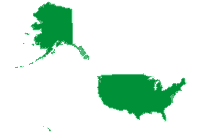

<Item title:"2017 USA Tapestry Segmentation-Copy" type:Map Image Layer owner:William.Floyd@cbre.com_dimension>
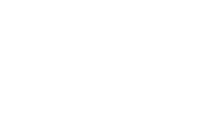

<Item title:"2017 USA Tapestry Segmentation" type:Map Image Layer owner:esri>
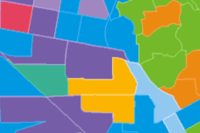

<Item title:"2017 USA Tapestry Segmentation - Copy" type:Map Image Layer owner:kelly.peoples@cbre.com_dimension>
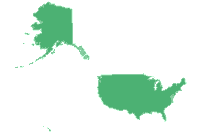

<Item title:"2017 USA Tapestry Segmentation - Copy" type:Map Image Layer owner:swoodward@lbschools.net>
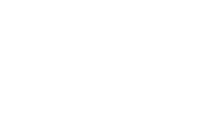

In [13]:
for item in tapestry_segmentation:
    display(item)

![](bikeroutesimages/layer.PNG)

Click on some of the segments in the vicinity of the Downtown area. The area north-east of the Downtown seems to have a large population of young professionals based on the median age and income values. As you move further from Downtown to the north-east (green and orange segments), the median ages increase slightly and the median incomes also increase. Based on the Tapestry descriptions this area is home to young, health-conscious and environmentally-conscious professionals. Therefore, it will serve as a good target for the bike routes.

Click on the neighbourhood polygon to find out more about the neighbourhood identified with the tapestry segmentation data.The name of the neighbourhood is Capitol Hill.

In [14]:
bike_route_neighbourhood = seattle_bike_routes.layers[1]

Apply a Filter to the Neighborhoods so that only Capitol Hill is showing.

In [15]:
bike_route_neighbourhood.filter = "L_HOOD = 'CAPITOL HILL'"

In [16]:
hill_map = gis.map('Seattle')
hill_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [17]:
hill_map.add_layer({"type":"FeatureLayer", 
               "url":bike_route_neighbourhood.url,
               "definition_expression" : "L_HOOD = 'CAPITOL HILL'",
               
              })

![](bikeroutesimages/L_hood.PNG)

In [18]:
bike_route_streets = seattle_bike_routes.layers[0]

In [19]:
bike_street_map = gis.map('Seattle')
bike_street_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/2.PNG)

In [20]:
bike_street_map.add_layer(bike_route_streets)

In order for Capitol Hill to be a good candidate for commuting bike routes the whole neighborhood must be within a reasonable biking distance from the downtown. Use the Measure tool (available in a web map) to calculate the approximate distance people in Capitol Hill may have to commute to get to the Downtown Office Core. The furthest points are approximately 3.7 miles apart, which is an easy distance for most young adults to bike.

Identify potential bike routes

The Streets layer includes main streets, trails, and other street types. Look at the trails first to determine if they can be used for commuting.
Filter the Streets so that only the trails are showing.
There are only three trails in the neighborhood and they are not long enough to be used for commuting. Remove the filter from the Streets layer.

In [21]:
bike_street_filtered_map = gis.map('Seattle')
bike_street_filtered_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/3.PNG)

In [22]:
bike_street_filtered_map.add_layer({"type":"FeatureLayer", 
               "url":bike_route_streets.url,
               "definition_expression" : "SEGMENT_TY = 8",
               
              })

There are not enough trails in the Capitol Hill neighborhood so bike lanes will have to be created on pre-existing streets. Since Seattle wants to build protected bike lanes, we will look at busier streets first to find the most direct routes. 
Use Find Existing Locations tool to select the arterial streets.

In [23]:
from arcgis.features.find_locations import find_existing_locations

In [24]:
 bike_route_streets.url

'https://services6.arcgis.com/sdbe23RSJ4l0hdpd/arcgis/rest/services/SeattleBikeRoutes/FeatureServer/0'

In [25]:
arterial_streets = find_existing_locations(input_layers=[ {'url': bike_route_streets.url}], 
                        expressions=[{"operator":"","layer":0,"where":"SEGMENT_TY = 1"},
                                     {"operator":"and","layer":0,"where":"ARTERIAL_C = 1"}],
                                       output_name='arterial street1')

In [26]:
from arcgis.features import FeatureLayerCollection

In [27]:
arterial_streets.layers[0].query(return_geometry=False, where='1=1')

<FeatureSet> 6605 features

In [28]:
arterial_streets

<Item title:"arterial street1" type:Feature Layer Collection owner:demos_deldev>

In [29]:
arteraial_map = gis.map('Seattle')
arteraial_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/4.PNG)

In [30]:
arteraial_map.add_layer(arterial_streets)

Examine the arterial roads in and around the Capitol Hill neighborhood. One road runs through the entire south-eastern side of the neighborhood and into the Downtown Office Core. According to the basemap the street is called E Madison St. Click the street and check the information in the pop-up box.
The highlighted line shows that the streets are stored as segments, with their breaks at each intersection, rather than as single continuous lines. Therefore, the segments need to be collected together to be used as a continuous street. The ORD_STREET and ORD_STNAME fields will be used to make street selections.

The highlighted line shows that the streets are stored as segments, with their breaks at each intersection, rather than as single continuous lines. Therefore, the segments need to be collected together to be used as a continuous street. The ORD_STREET and ORD_STNAME fields will be used to make street selections.
 

![](bikeroutesimages/Emadison.PNG)

In [31]:
arterial_streets_layer = arterial_streets.layers[0]

In [32]:
arterial_streets_layer.url

'https://services6.arcgis.com/SMX5BErCXLM7eDtY/arcgis/rest/services/arterial street1/FeatureServer/0'

In [33]:
bike_route_neighbourhood.url

'https://services6.arcgis.com/sdbe23RSJ4l0hdpd/arcgis/rest/services/SeattleBikeRoutes/FeatureServer/1'

In [34]:
arterial_streets_layer.url

'https://services6.arcgis.com/SMX5BErCXLM7eDtY/arcgis/rest/services/arterial street1/FeatureServer/0'

# Python API Bug!!!

In [34]:
madison_street = find_existing_locations(input_layers=[arterial_streets_layer, bike_route_neighbourhood], 
                        expressions=[{"operator":"","layer":0,"where":"ORD_STREET = 'MADISON'"},
                                     {"operator":"and","layer":0,"selectingLayer":1,"spatialRel":"withinDistance","distance":3.5,"units":"Feet"}],
                                       output_name='Madison Street')

TypeError: Object of type 'FeatureLayer' is not JSON serializable

Use Find Existing Locations to select the segments of Madison Street that are within 3.5 feet of Capitol Hill. The distance has to be used because the street shares a border with Capitol Hill and some segments are located just outside of the boundary. Note that the actual bike lane would run all the way to the Downtown Office Core , but this analysis is determining how well the lanes service a specific neighborhood, so only the sections of the road within that neighborhood are required. The Neighborhoods filter will be applied to the tool.

In [35]:
madison_street = find_existing_locations(input_layers=[ {'url': arterial_streets_layer.url}, {'url': bike_route_neighbourhood.url}], 
                        expressions=[{"operator":"","layer":0,"where":"ORD_STREET = 'MADISON'"},
                                     {"operator":"and","layer":1,"where":"L_HOOD = 'CAPITOL HILL'"},
                                     {"operator":"and","layer":0,"selectingLayer":1,"spatialRel":"withinDistance","distance":3.5,"units":"Feet"}],
                                       output_name='Madison street1')

In [36]:
madison_street

<Item title:"Madison street1" type:Feature Layer Collection owner:demos_deldev>

Calculate the statistics for the madison_street layer.

In [37]:
fs = madison_street.layers[0].query(where='1=1', returnGeometry=False, spatialRel='esriSpatialRelIntersects',
                               outFields='Length',
                               outStatistics=[{"statisticType":"count","onStatisticField":"Length","outStatisticFieldName":"countField"},{"statisticType":"sum","onStatisticField":"Length","outStatisticFieldName":"sumField"},{"statisticType":"min","onStatisticField":"Length","outStatisticFieldName":"minField"},{"statisticType":"max","onStatisticField":"Length","outStatisticFieldName":"maxField"},{"statisticType":"avg","onStatisticField":"Length","outStatisticFieldName":"avgField"},{"statisticType":"stddev","onStatisticField":"Length","outStatisticFieldName":"stddevField"}])

In [38]:
fs.df

,avgField,countField,maxField,minField,stddevField,sumField,SHAPE
0,0.060375,41,0.176863,0.015123,0.032105,2.475384,"{'spatialReference': {'wkid': 2926, 'latestWki..."


The length of the street within Capitol Hill is 2.48 miles.Note this distance for future use.

In [39]:
bike_route_neighbourhood.filter

"L_HOOD = 'CAPITOL HILL'"

In [40]:
madison_street_layer = madison_street.layers[0]

In [41]:
madison_map = gis.map('Seattle')
madison_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/5.PNG)

In [42]:
madison_map.add_layer(madison_street)


Apply a Buffer of 0.5 miles to MadisonStreet to determine the area that the bike route would service.

In [43]:
from arcgis.features.use_proximity import create_buffers

In [44]:
buffer_street = create_buffers(madison_street_layer, dissolve_type='Dissolve', distances=[0.5],
               ring_type='Rings', units='Miles', output_name="buffer_madison_street1")

In [45]:
buffer_street_layer = buffer_street.layers[0]

In [46]:
buffer_street_map = gis.map('Seattle')
buffer_street_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/6.PNG)

In [47]:
buffer_street_map.add_layer(buffer_street)

The bike route services the eastern edge of the neighbourhood.More bikes routes will need to be choosen in the central and western portion of the neighbourhood.

Repeat the process (selecting, buffering, and calculating the length of the segments) for 10th Ave E/Broadway E.

In [49]:
broadway_ave = find_existing_locations(input_layers=[{'url': arterial_streets_layer.url}, {'url': bike_route_neighbourhood.url}], 
                        expressions=[{"operator":"","layer":0,"where":"ORD_STNAME = '10TH AVE E'"},
                                     {"operator":"and","layer":1,"where":"L_HOOD = 'CAPITOL HILL'"},
                                     {"operator":"or","layer":0,"where":"OBJECTID = 789"},
                                     {"operator":"or","layer":0,"where":"ORD_STNAME = 'BROADWAY'"},
                                     {"operator":"or","layer":0,"where":"ORD_STNAME = 'BROADWAY E'"},
                                     {"operator":"and","layer":0,"selectingLayer":1,"spatialRel":"withinDistance","distance":0.001,"units":"Feet"}],
                                       output_name='Broadway_ave1')

In [50]:
broadway_ave_layer = broadway_ave.layers[0]

In [51]:
broadway_ave_map = gis.map('Seattle')
broadway_ave_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/7.PNG)

In [52]:
broadway_ave_map.add_layer(broadway_ave)

Create buffer for this street also.

In [53]:
buffer_street_broadway = create_buffers(broadway_ave_layer, dissolve_type='Dissolve', distances=[0.5],
               ring_type='Rings', units='Miles', output_name="buffer_broadway_street1")

In [54]:
buffer_street_broadway_map = gis.map('Seattle')
buffer_street_broadway_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/buffer.PNG)

In [55]:
buffer_street_broadway_map.add_layer(buffer_street_broadway)

A bike route is still needed in the central portion of Capitol Hill.

Repeat the process once more for 24th Ave and 23rd Ave.

In [56]:
ave = find_existing_locations(input_layers=[{'url': arterial_streets_layer.url}, {'url': bike_route_neighbourhood.url}], 
                        expressions=[{"operator":"","layer":0,"where":"ORD_STNAME = '23RD AVE'"},
                                     {"operator":"and","layer":1,"where":"L_HOOD = 'CAPITOL HILL'"},
                                     {"operator":"or","layer":0,"where":"ORD_STNAME = '23RD AVE E'"},
                                     {"operator":"or","layer":0,"where":"ORD_STNAME = '24TH AVE E'"},
                                     {"operator":"or","layer":0,"where":"ORD_STNAME = 'TURNER WAY E'"},
                                     {"operator":"and","layer":0,"selectingLayer":1,"spatialRel":"withinDistance","distance":0.001,"units":"Feet"}],
                                       output_name='street 23rd 24th AVE1')

In [57]:
ave_layer = ave.layers[0]

In [58]:
ave_map = gis.map('Seattle')
ave_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/9.PNG)

In [59]:
ave_map.add_layer(ave)

Repeat the process to create bufferfor this street as well.

In [60]:
buffer_street_ave = create_buffers(ave_layer, dissolve_type='Dissolve', distances=[0.5],
               ring_type='Rings', units='Miles', output_name="Buffer_2324ave_Street1")

In [61]:
buffer_street_map = gis.map('Seattle')
buffer_street_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/10.PNG)

In [62]:
buffer_street_map.add_layer(buffer_street_ave)

In [63]:
all_buffers_map = gis.map('Seattle')
all_buffers_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/all_buffer.PNG)

In [65]:
all_buffers_map.add_layer(buffer_street)
all_buffers_map.add_layer(buffer_street_broadway)
all_buffers_map.add_layer(buffer_street_ave)

The buffered roads now cover most of the neighbourhood.

Determine the effectiveness of the selected routes

The length of potential bike lanes within the neighborhood will be compared to the length of all of the streets within the neighborhood. Select the streets (SEGMENT_TY=1) within Capitol Hill using Find Existing Locations. 

In [66]:
capitol_hill_streets = find_existing_locations(input_layers=[{'url': bike_route_streets.url}, {'url': bike_route_neighbourhood.url}], 
                        expressions=[{"operator":"","layer":0,"where":"SEGMENT_TY = 1"},
                                     {"operator":"and","layer":1,"where":"L_HOOD = 'CAPITOL HILL'"},
                                     {"operator":"and","layer":0,"selectingLayer":1,"spatialRel":"withinDistance","distance":3.5,"units":"Feet"}],
                                       output_name='Capitol_Hill1')

In [ ]:
capitol_hill_streets

Use **summarize** to calculate the total length of roads in Capitol Hill.

In [67]:
st = capitol_hill_streets.layers[0].query(where='1=1', returnGeometry=False, spatialRel='esriSpatialRelIntersects',
                               outFields='Length',
                               outStatistics=[{"statisticType":"count","onStatisticField":"Length","outStatisticFieldName":"countField"},{"statisticType":"sum","onStatisticField":"Length","outStatisticFieldName":"sumField"},{"statisticType":"min","onStatisticField":"Length","outStatisticFieldName":"minField"},{"statisticType":"max","onStatisticField":"Length","outStatisticFieldName":"maxField"},{"statisticType":"avg","onStatisticField":"Length","outStatisticFieldName":"avgField"},{"statisticType":"stddev","onStatisticField":"Length","outStatisticFieldName":"stddevField"}])

In [68]:
st.df

,avgField,countField,maxField,minField,stddevField,sumField,SHAPE
0,0.068718,1361,0.944354,0.002864,0.047955,93.52469,"{'spatialReference': {'wkid': 2926, 'latestWki..."


The total length of roads within Capitol Hill is 93.5 miles.
Use the sums from the three potential routes along with the sum from the current step to calculate the percentage of road length being used within the neighborhood. The percentage works out to approximately 6.57%, which is a low estimate because many of the line segments extend outside of Capitol Hill.

Use **merge_layers** tool to combine the three buffers into a single layer. You will have to run the tool twice to merge all three buffers.

In [69]:
from arcgis.features.manage_data import merge_layers

In [71]:
merge_of_madison_broadway_buffer = merge_layers(buffer_street, buffer_street_broadway, output_name='merge 1')

In [73]:
merge_of_madison_broadway_buffer

<Item title:"merge 1" type:Feature Layer Collection owner:demos_deldev>

In [74]:
merge_all_buffers = merge_layers(merge_of_madison_broadway_buffer, buffer_street_ave, output_name='merge 2')

In [75]:
merge_all_buffers

<Item title:"merge 2" type:Feature Layer Collection owner:demos_deldev>

In [76]:
buffer_map = gis.map('Seattle')
buffer_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/merge.PNG)

In [77]:
buffer_map.add_layer(merge_all_buffers)

Use Dissolve Boundaries tool on the merged buffers so that all of the buffers are in a single polygon.

In [78]:
from arcgis.features.manage_data import dissolve_boundaries

In [79]:
dissolve = dissolve_boundaries(merge_all_buffers, output_name='dissolved Layer1')

In [80]:
dissolve_map = gis.map('Seattle')
dissolve_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/dissolved.PNG)

In [81]:
dissolve_map.add_layer(dissolve)

Use Overlay Layers tool to clip the dissolved buffers to the shape of Capitol Hill. The clipped buffers will be used to determine the number of Capitol Hill residents that live within 1/2 mile of the bike routes.

In [82]:
from arcgis.features.manage_data import overlay_layers

In [83]:
cliped_buffer = overlay_layers(dissolve, bike_route_neighbourhood, tolerance=0, context={},
                           output_name="Cliped Buffer1")

In [84]:
cliped_buffer_layer = cliped_buffer.layers[0]

In [85]:
cliped_buffer_map = gis.map('Seattle')
cliped_buffer_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](bikeroutesimages/14.PNG)

In [86]:
cliped_buffer_map.add_layer(cliped_buffer)

Use **enrich_layer** tool to add population data to the clipped_buffer_layer made in the previous step.  

In [87]:
from arcgis.features.enrich_data import enrich_layer

In [88]:
clipped_enrich = enrich_layer(cliped_buffer_layer, 
                              analysis_variables=["AtRisk.TOTPOP_CY"], 
                              output_name='enriched with pop1')

Use enrich_layer to add population data to Capitol Hill. Use the same population variable as in the previous step.

In [89]:
capitolhill_enrich = enrich_layer(bike_route_neighbourhood, 
                              analysis_variables=["AtRisk.TOTPOP_CY"], 
                              output_name='capitolhill enriched with pop1')

In [90]:
gt = clipped_enrich.layers[0].query(where='1=1', returnGeometry=False, spatialRel='esriSpatialRelIntersects',
                               outFields='TOTPOP_CY',
                               outStatistics=[{"statisticType":"count","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"countField"},{"statisticType":"sum","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"sumField"},{"statisticType":"min","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"minField"},{"statisticType":"max","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"maxField"},{"statisticType":"avg","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"avgField"},{"statisticType":"stddev","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"stddevField"}])

In [91]:
gt.df

,avgField,countField,maxField,minField,stddevField,sumField,SHAPE
0,9886.2,5,27189,1263,10397.063081,49431,"{'spatialReference': {'wkid': 2926, 'latestWki..."


In [92]:
st = capitolhill_enrich.layers[0].query(where='1=1', returnGeometry=False, spatialRel='esriSpatialRelIntersects',
                               outFields='TOTPOP_CY',
                               outStatistics=[{"statisticType":"count","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"countField"},{"statisticType":"sum","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"sumField"},{"statisticType":"min","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"minField"},{"statisticType":"max","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"maxField"},{"statisticType":"avg","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"avgField"},{"statisticType":"stddev","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"stddevField"}])

In [93]:
st.df

,avgField,countField,maxField,minField,stddevField,sumField,SHAPE
0,9950.8,5,27189,1549,10333.549787,49754,"{'spatialReference': {'wkid': 2926, 'latestWki..."


Approximately 99.3% of Capitol Hill's residents are within 1/2 mile of a bike lane.